In [1]:
# Import the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
# Lets load the dataset
data=pd.read_csv(r"F:\USL\CASE STUDY\Country-data.csv")

In [6]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


## Lets explore the Data

In [7]:
data.shape

(167, 10)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


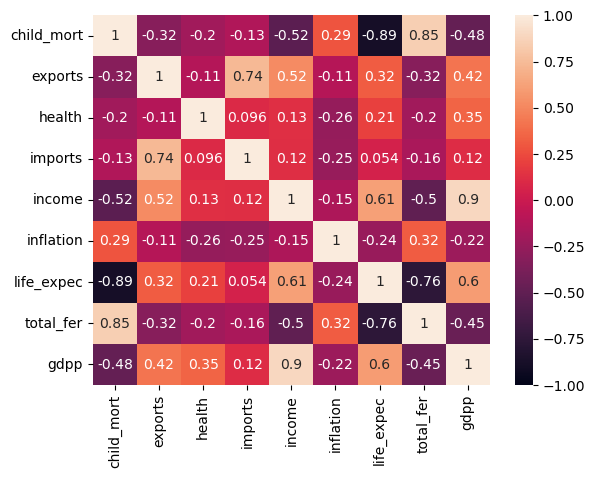

In [11]:
# Correlation Heatmap
sns.heatmap(data.corr(numeric_only=True),annot=True,vmin=-1)
plt.show()

## Visualise the Data

In [12]:
# Before we begin visualisation lets convert coutry to index as it's a redundant column 
data.set_index('country',inplace=True)

In [13]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


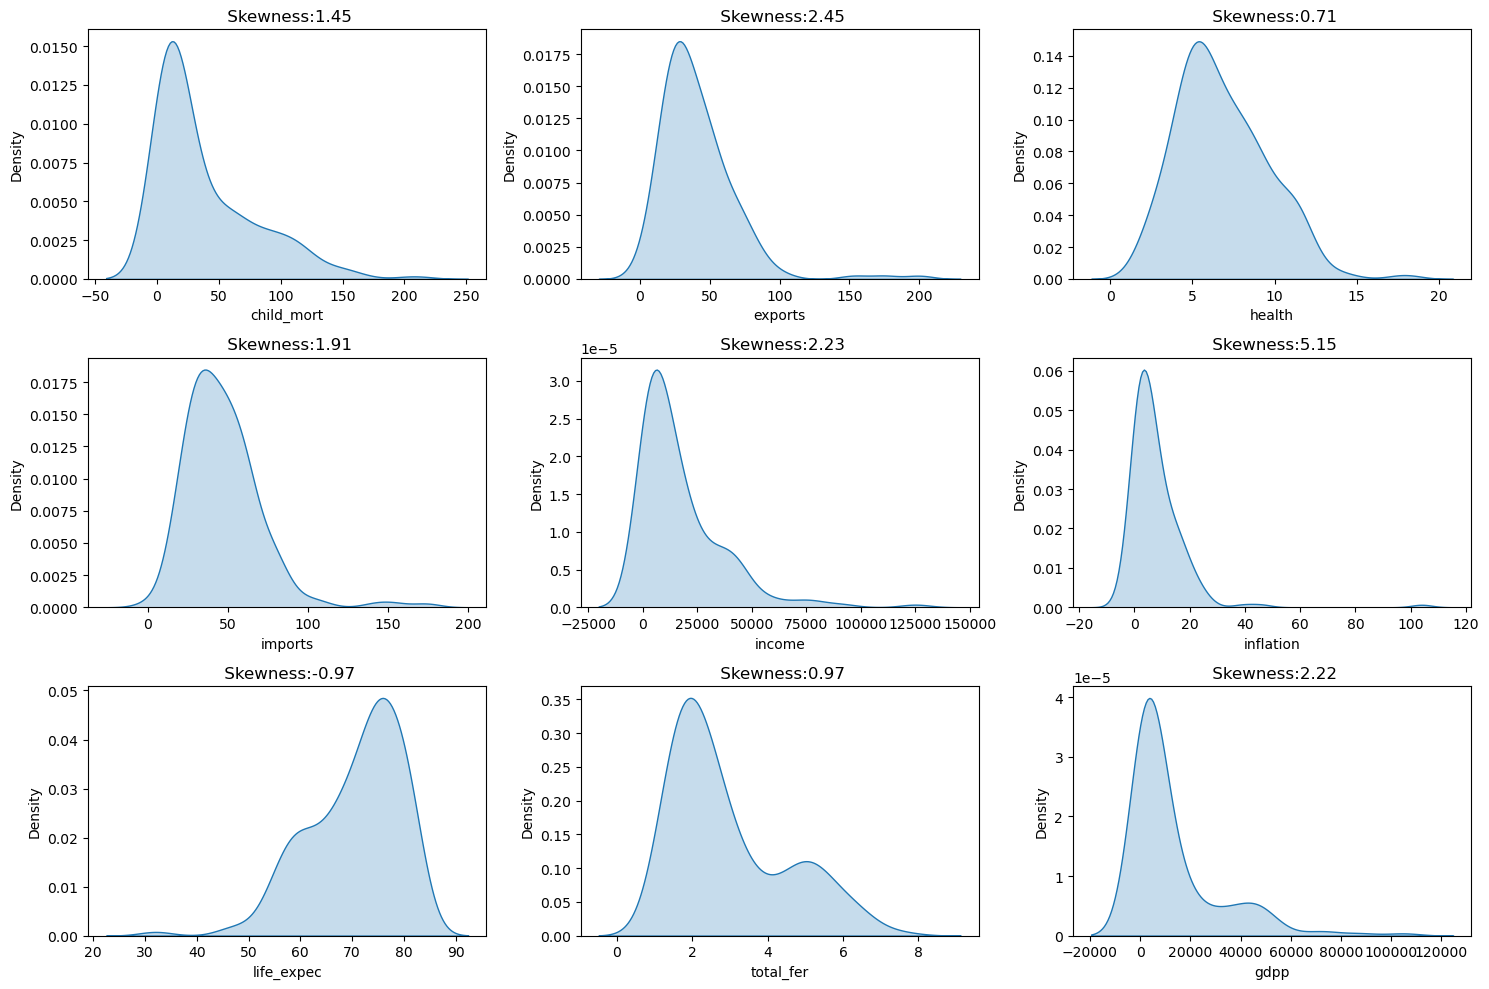

In [16]:
# Lets do the inivariate analysis 
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.kdeplot(data,x=i,fill=True)
    plt.title(f' Skewness:{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

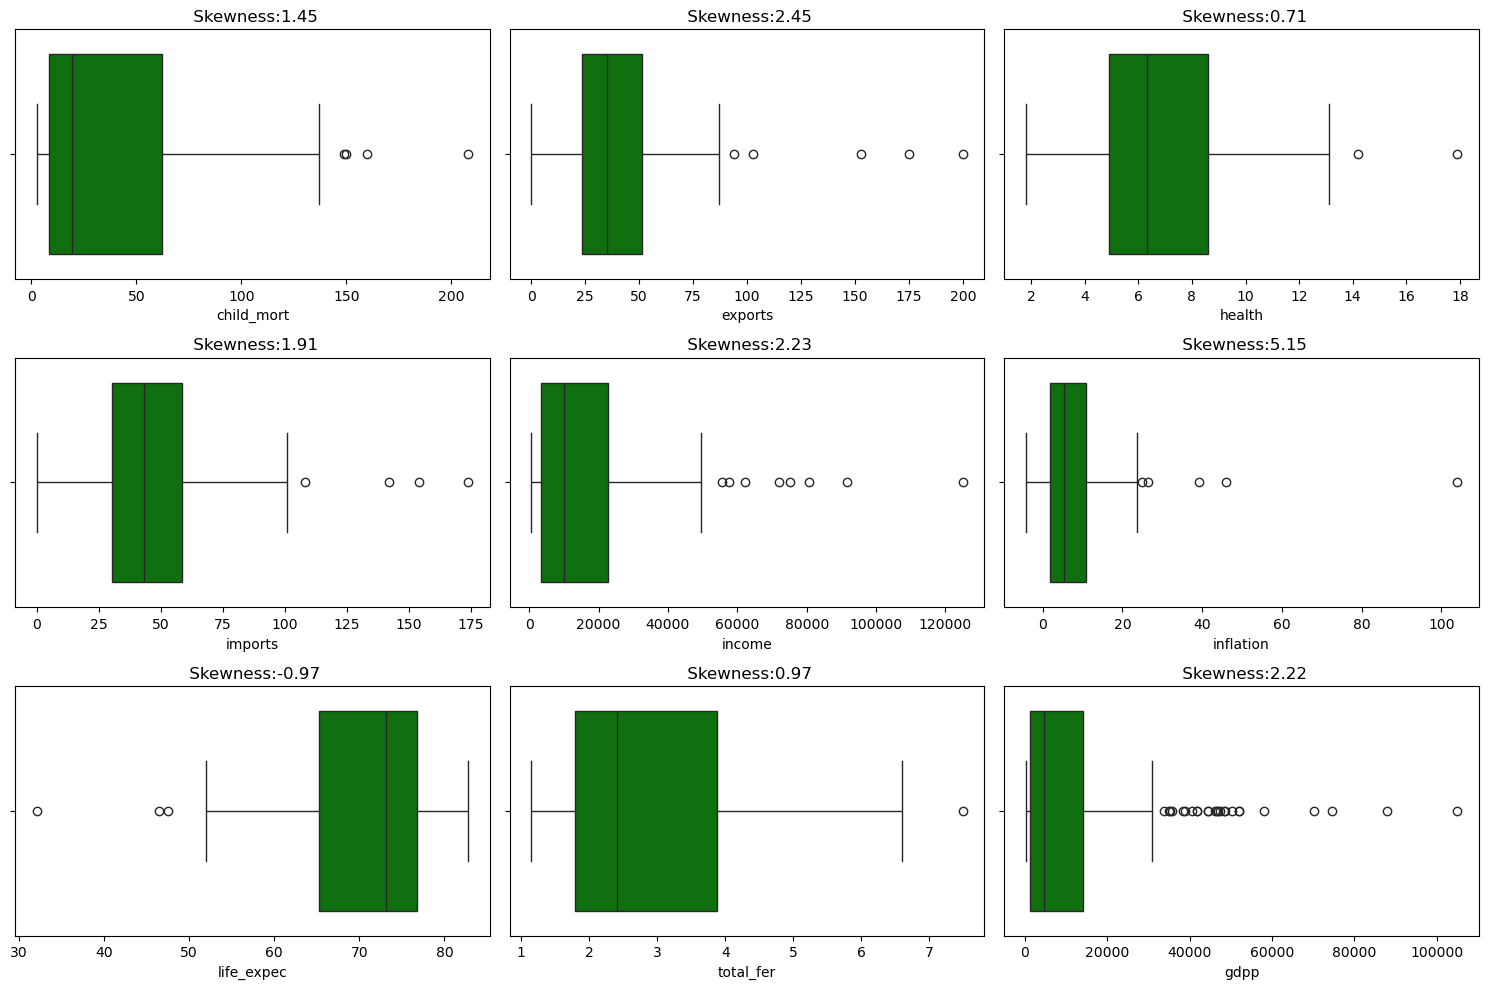

In [18]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data,x=i,color='green')
    plt.title(f' Skewness:{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

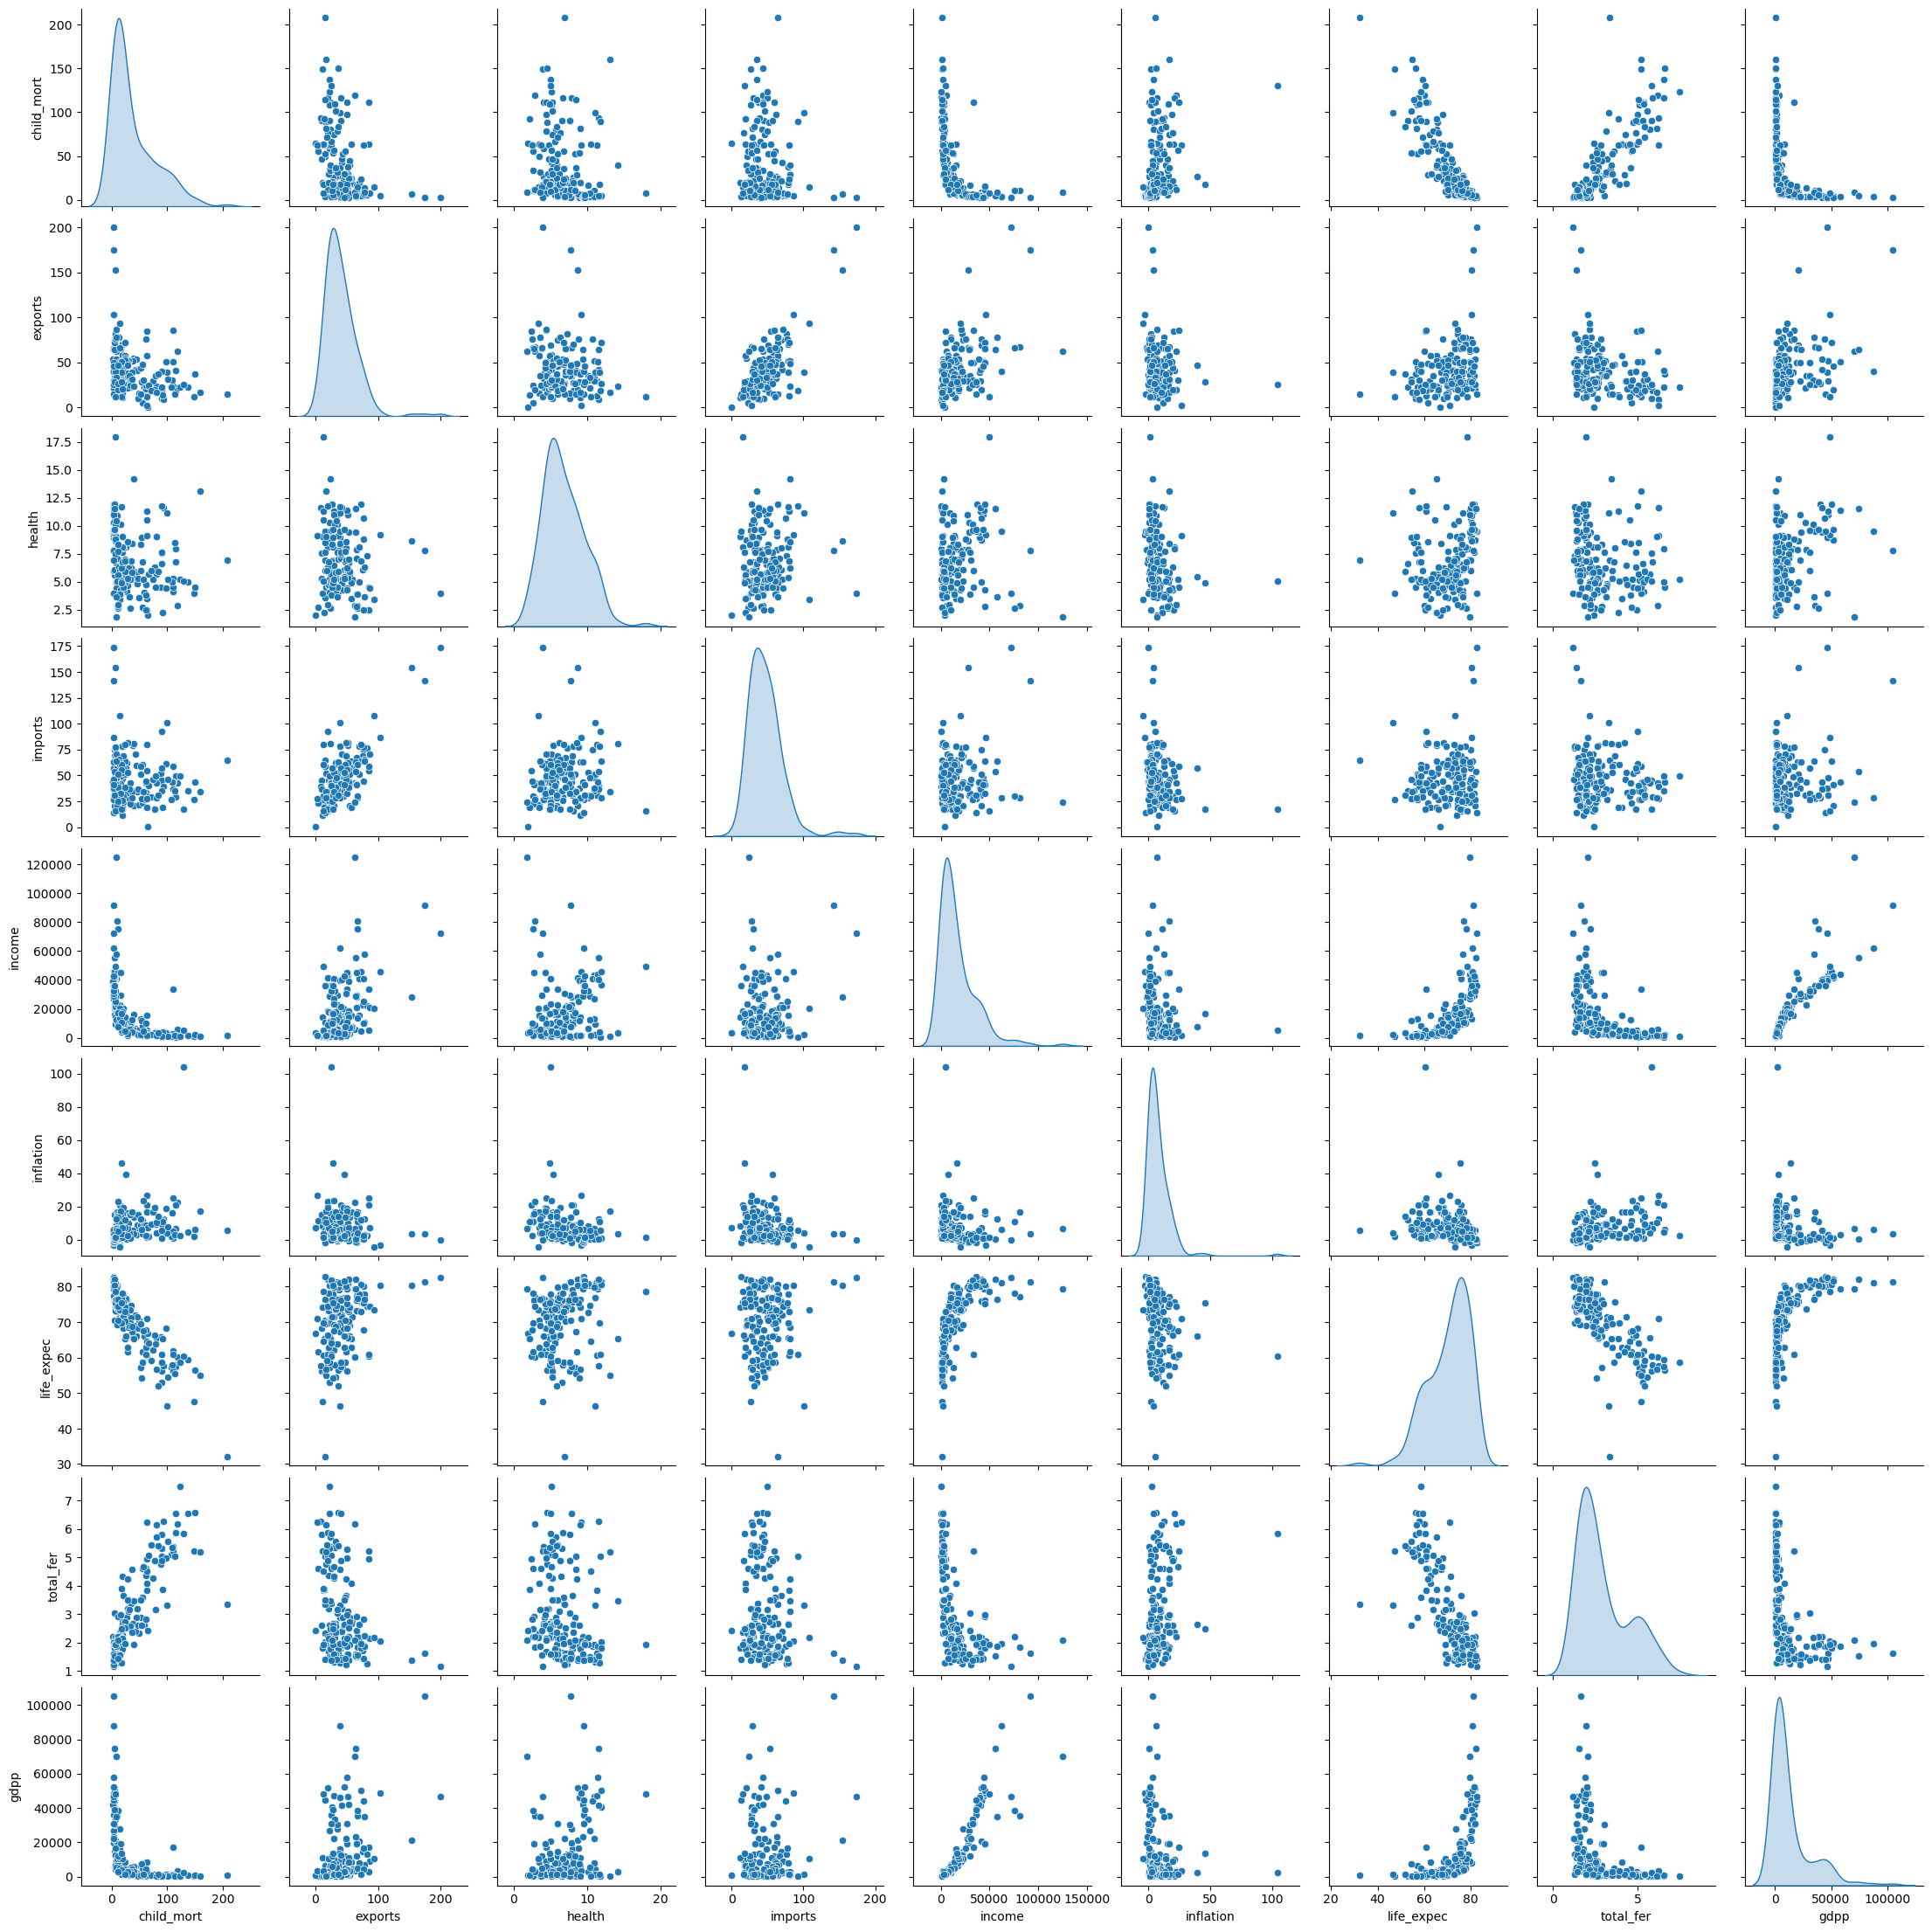

In [21]:
# Multivariate Analysis
sns.pairplot(data,diag_kind='kde')
plt.show()

## Data Preprocessing 

In [23]:
# Check for missing values 
data.isnull().sum()
# There are no missing values

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [24]:
# Lets treat the extreme outliers 
# We will go with capping using IQR method 
# In order to cap only the extreme ones lets keep whiskers lenght=2.5

for i in data.columns:
    q3,q1=np.quantile(data[i],[0.75,0.25])   
    iqr=q3-q1 
    ul,ll=q3+2.5*iqr,q1-2.5*iqr
    data[i]=data[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

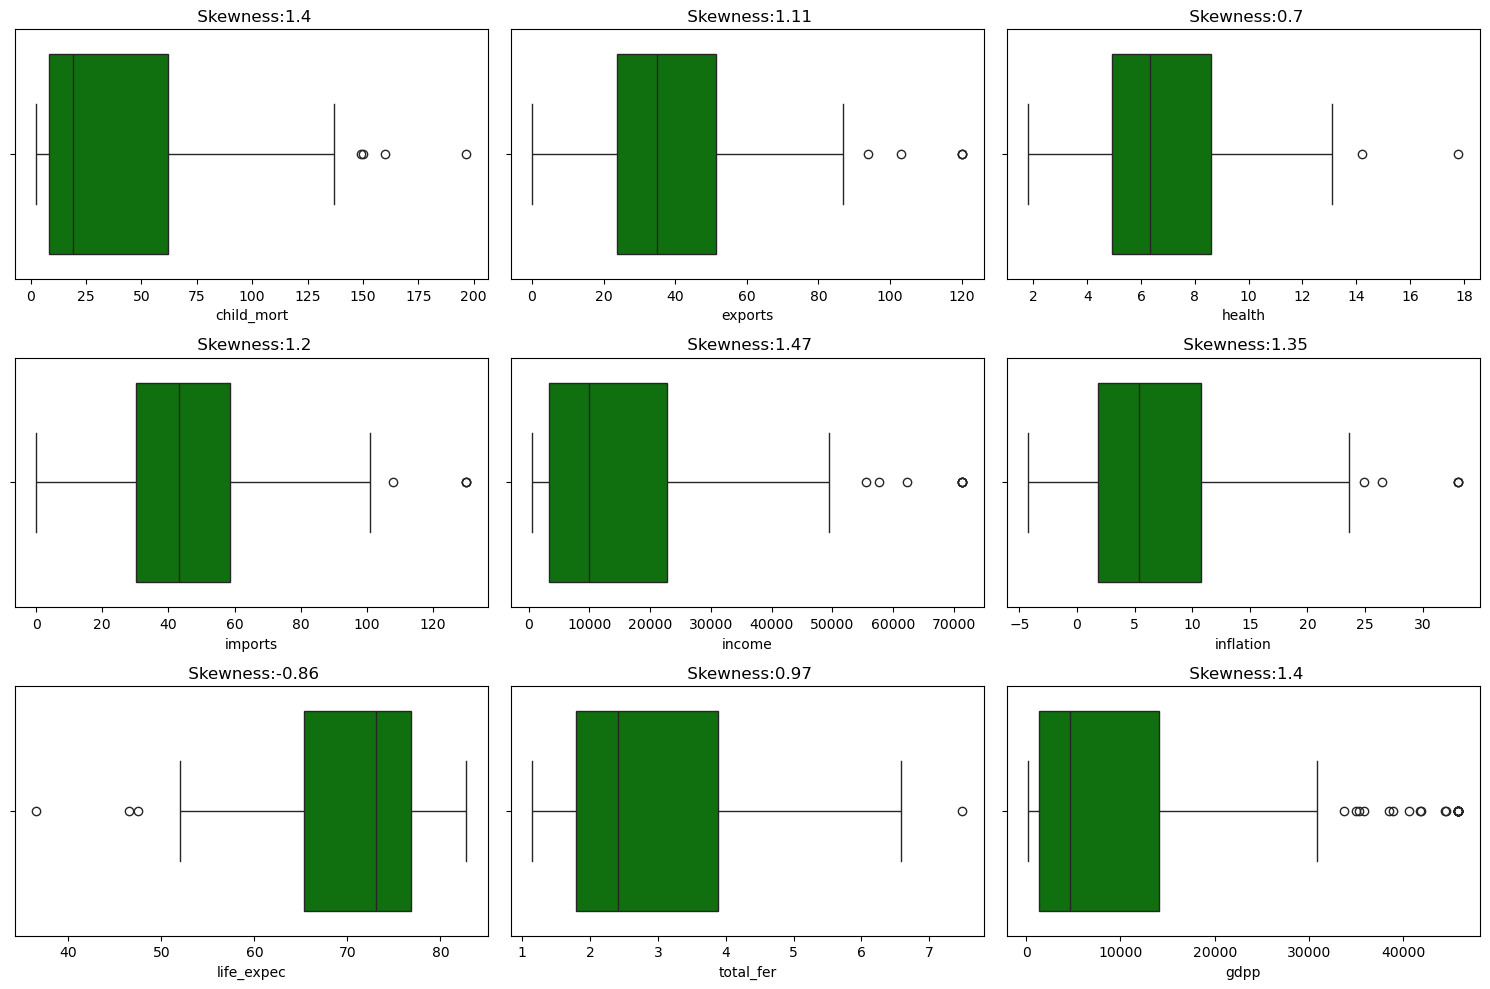

In [25]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data,x=i,color='green')
    plt.title(f' Skewness:{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [27]:
# Lets apply PCA on the data before we proceed with clustering.
# Just to have better visualisation and for better clustering.
# In PCA we need to pass standardise data.So lets import the libraries

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline



In [33]:
# Lets create an instance of scaling 
scaler=StandardScaler()

# Lets create an instance for PCA
pca=PCA(n_components=5,random_state=2)

# Lets create pipeline for the above two process
pipeline=Pipeline([('Scale',scaler),
                   ('PCA',pca)])


In [34]:
pipeline.fit(data)

Pipeline(steps=[('Scale', StandardScaler()),
                ('PCA', PCA(n_components=5, random_state=2))])

In [35]:
pca.explained_variance_  # Eigen values

array([4.30850704, 1.51337327, 1.22641085, 0.92104999, 0.60026658])

In [37]:
pca.explained_variance_ratio_.cumsum()

# At n_components= 5 we are able to explain ~ 95% of variance which is good enough 
# So 9-Dimensional data can be reduced to 5-Dimensional data 

array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697])

In [44]:
final_data=pipeline.transform(data)

In [45]:
# .transform returns the array so lets conert it into DataFrame
final_data=pd.DataFrame(final_data,columns=['PC1','PC2','PC3','PC4','PC5'],index=data.index)

In [46]:
final_data.head(3)

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119


# K-Means Clustering 

In [51]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Identify the value of K 
# K-Elbow Visualiser 
kelbow=KElbowVisualizer(estimator=KMeans(random_state=2),k=10)

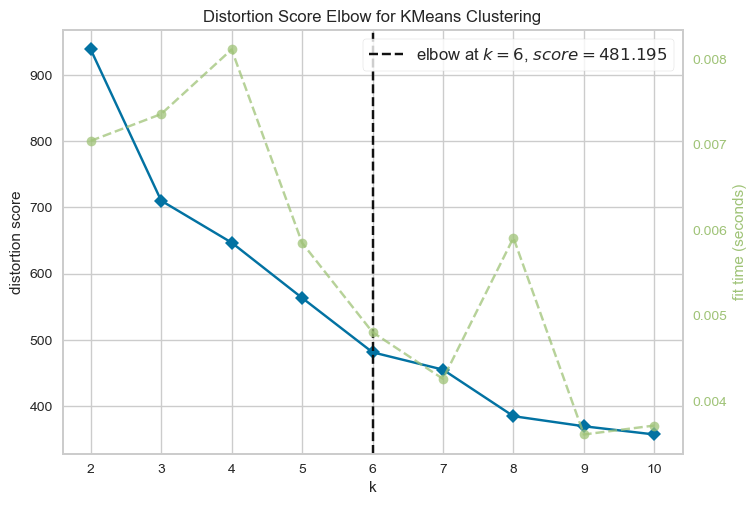

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
kelbow.fit(final_data)
kelbow.show()

**Although the above plot marks the elbow at k=6.But we can see the significant drop in distortion score from k=2 to k=3.As we increase the number of clusters it might become overfitted, so lets explore Silhouette Visualiser to identify the correct or more generelised value of k.**

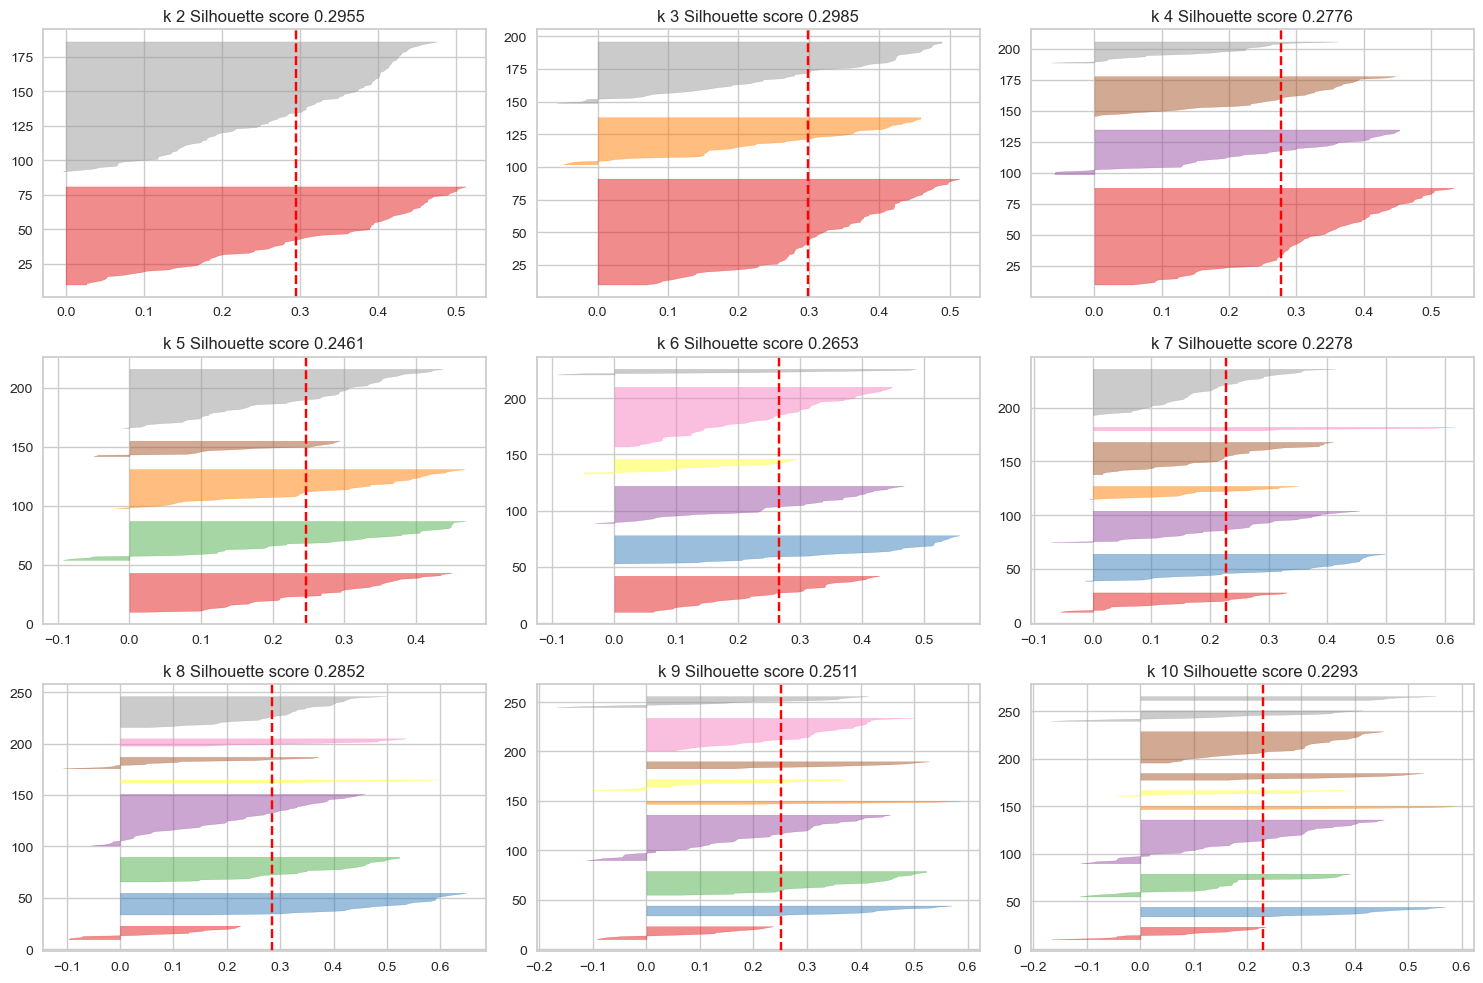

In [61]:
t =1
plt.figure(figsize=(15,10))
for i in range(2,11):
    plt.subplot(3,3,t)
    model = KMeans(n_clusters=i,random_state=2)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(final_data)
    plt.title(f'k {i} Silhouette score {round(sil_viz.silhouette_score_,4)}')
    t+=1
plt.tight_layout()
plt.show()

**After analysing Elbow Plot and Silhouette Visualiser Lets go with k=3.Although there are few datapoints that have been misclassified,but we see drop in Silhouette score and there is good enough data in every cluster.Also from k-elbow plot significant drop in WCSS(Distortion score) was observed from k=2 to k=3.**

In [58]:
final_kmeans=KMeans(n_clusters=3,random_state=2)

In [59]:
label=final_kmeans.fit_predict(final_data)

In [60]:
# Lets check the Silhouette Score
print('Silhouette Score:',silhouette_score(final_data,label))

Silhouette Score: 0.2984578234829661


In [63]:
# Lets put these labels on PCA data 
final_data['Label']=label
final_data.head()

,PC1,PC2,PC3,PC4,PC5,Label
country,,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800,2
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623,0
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119,0
Angola,-3.150063,1.425283,-1.784982,1.580071,0.142609,2
Antigua and Barbuda,1.145313,0.392985,0.151332,-0.823193,-0.370311,0


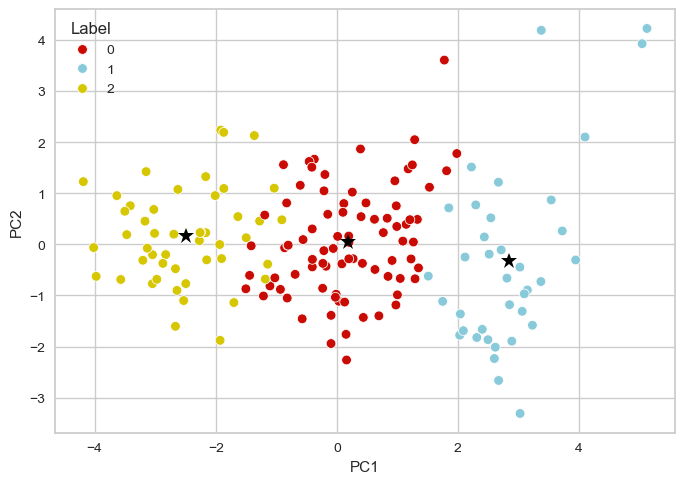

In [69]:
# Lets Visualise the cluster 
# In order to get the best visualisation lets choose PC1 and PC2 as they have maximumn variance 
centroids=final_kmeans.cluster_centers_
centroids

sns.scatterplot(data=final_data,x='PC1',y='PC2',palette=['r','c','y'],hue='Label')
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='*',ms=12,color='black')
plt.show()

# Business Interpretation

In [71]:
# To have business understanding lets put the labels on original dataset 
data['Label']=label
data.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0


In [72]:
data.groupby(by='Label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Label,,,,,,,,,
0,21.508537,40.797317,6.231951,48.097561,12281.097561,7.474744,72.875610,2.311707,6291.146341
1,5.237838,53.575000,8.780270,49.129054,42690.878378,2.588432,79.956757,1.755676,36905.405405
2,92.131771,28.546229,6.296458,41.443040,3937.770833,10.438854,59.438542,4.953958,1902.916667


**After studying the above data we can conclude that countries that have been assigned in cluster 2 can be called Under Developed, while cluster 1 are Developed.Countries belonging to cluster 0 are doing average in most of the factors but struggling in some economic factors like GDPP/Income and expenditure on Health.Hence they can call Developing.**

In [74]:
data['Label']=data['Label'].map({0:'Developing',1:'Developed',2:'Under Developed'})

In [75]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Under Developed
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Under Developed
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Developing


In [76]:
# Developed Countries 
data[data['Label']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [77]:
# Developing Countries 
data[data['Label']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', '

In [79]:
# Under Developed
data[data['Label']=='Under Developed'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

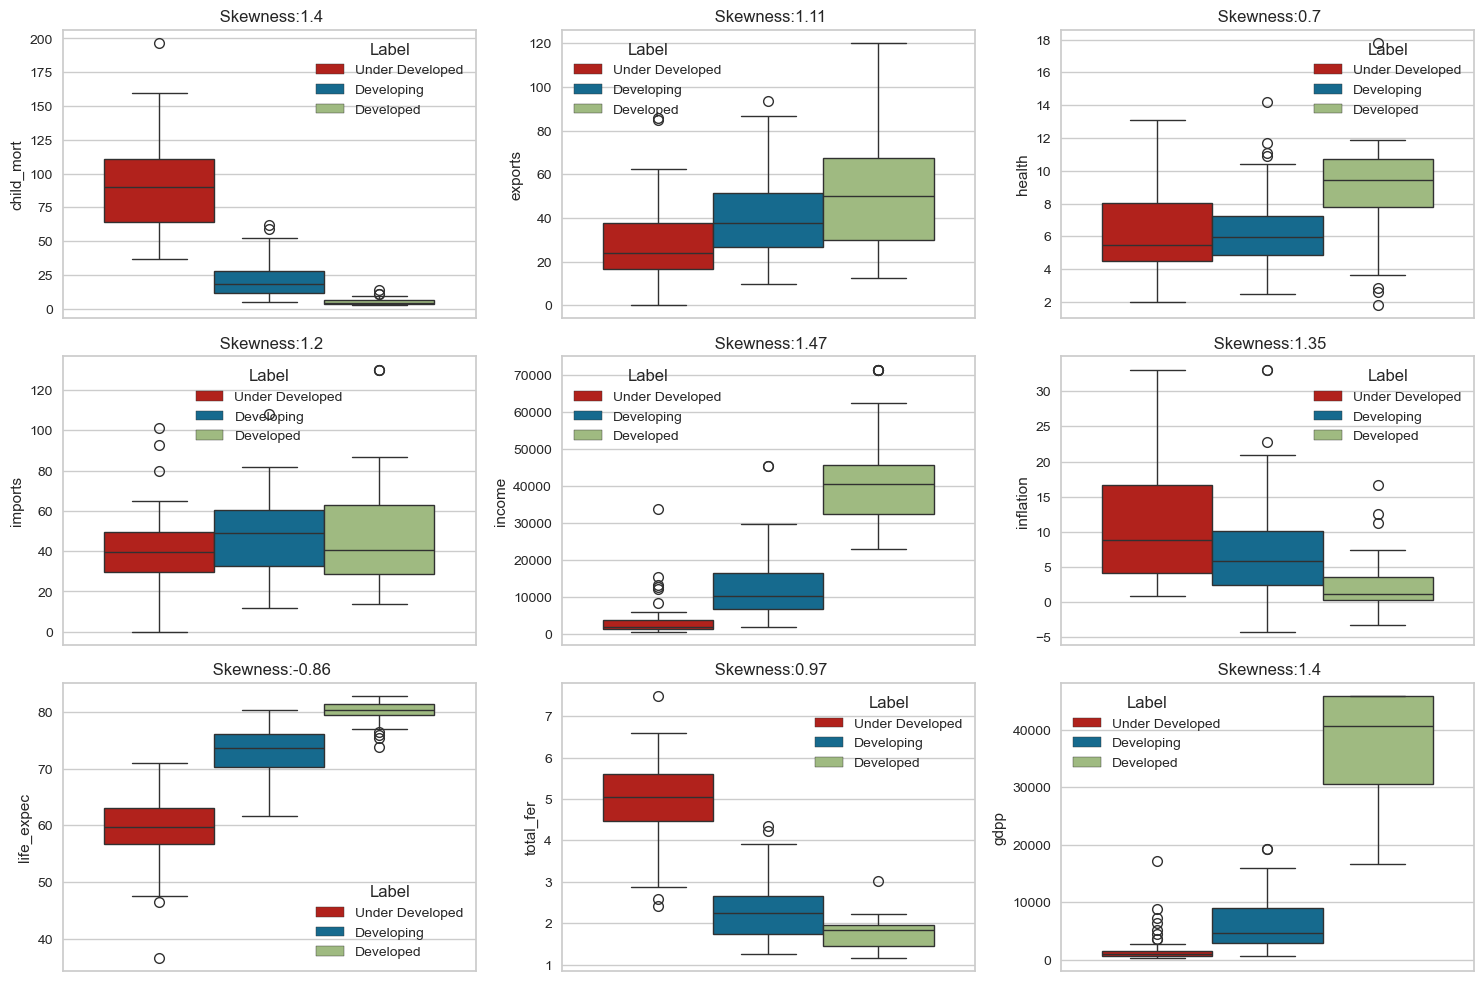

In [83]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    if i!='Label':
         plt.subplot(3,3,t)
         sns.boxplot(data,y=i,hue='Label',palette=['r','b','g'])
         plt.title(f' Skewness:{round(data[i].skew(),2)}')
         t+=1
plt.tight_layout()
plt.show()

In [82]:
import plotly.express as px

In [86]:
# World Map 
px.choropleth(data_frame=data,locationmode='country names',locations=data.index,color='Label',
              color_discrete_map={'Under Developed':'red','Developing':'blue','Developed':'green'})

# Deployment 

In [90]:
input_data=data.iloc[0,:-1].values
input_data

array([np.float64(90.2), np.float64(10.0), np.float64(7.58),
       np.float64(44.9), np.float64(1610.0), np.float64(9.44),
       np.float64(56.2), np.float64(5.82), np.float64(553.0)],
      dtype=object)

In [91]:
final_input_data=pipeline.transform([input_data])
final_input_data 

array([[-3.04363665, -0.20115529,  0.95132235,  0.79344472, -0.00680001]])

In [93]:
final_kmeans.predict(final_input_data)[0]

np.int32(2)

In [94]:
import joblib

In [95]:
# Lets create a joblib file of pipeline 
with open('pipeline.joblib','wb') as file:
    joblib.dump(pipeline,file)

In [96]:
# Lets create a joblib file for model 
with open('model.joblib','wb') as file:
    joblib.dump(final_kmeans,file)